<a id="timeseries"></a>
# Time series 


_"It’s Difficult to Make Predictions, Especially About the Future"_

                                - Niels Bohr (or Piet Hein)
                                
_"I have seen the future and it is very much like the present, only longer."_

                                - Kehlog Albran, The Profit


Or: What if regression happens in time?


# New Section


It is a common case - often offering serious business advantages -  to use a time series of datapoints measured in certain intervals in time to predict the (some) next values of a given target value. (weather, operating parameters, traffic, exchange rates ...)


## Basic observations / definitions  

**Sequential Data:**

The order of the data matters, but the time stamp is irrelevant or it doesn’t matter. (Example: DNA sequence. The concept of time is irrelevant, so the order is not temporal.)

**Temporal Sequence:**

In addition to the order of data, the time stamp also matters. (Example: Data collected from customers’ shopping behaviour, considering their transaction time stamp as the temporal dimension.)

**Time Series:**

The data is in order, with a fixed time-difference between occurrence of successive data points. (Example: Time series of the temperature of a surface being recorded every 120 seconds.) 

([source](https://www.quora.com/What-is-the-difference-between-time-series-and-sequential-data))


In the special case when the temporal signals have also some spatial aspect, think for example speed measurements of cars at different locations we talk about "spatio-temporal" data. This type of problem lies out of scope for this course, but a good overview of methods can be found [here](https://www.mdpi.com/2220-9964/4/4/2306/pdf) and [here](https://arxiv.org/pdf/1711.04710).




**There are obvious differences from the datasets we've been working with prior:**

- The **sequential position** of the datapoints (commonly represented as datarows) is of paramount importance (we are in trouble if we would like to draw a random sample...)
- We should not have an *i.i.d.* (independent and identically distributed) assumtion, so we should be well advised to think that there is a **relationship between successive datapoints**.
- It is always suspicious whether the [Markov assumption of conditional independence](https://en.wikipedia.org/wiki/Markov_property) holds in case of the data. For random walks it does, but it it is rarely the case in practice. (We can try to figure out which "order" of Markov property is present, but it is not a clear cut line. (_Does the weather of tomorrow depend on today? And yesterday? And the year before? And hundred?..._)

## Main learning scenarios


### Prediction basis

- One variable (**univariate time series**):

We have at our disposal a sequence of measurements from one variable, our goal is to predict the (some) next measurement point(s). (If we look closely, we can phrase it as a two (or more) variable regression problem where the independent variable(s) is(are) time steps into the past and the dependent variable is the step into the future that needs to be predicted.)

In this case we **base our prediction on the variable itself about its next state**; this presupposes that the "history" of the variable, that is some prior measurements of it have predictive power regarding its future behavior. (Markov n?...)

- We have more variables to work with (**Multivariate timeseries**)

We have parallel measurements of multiple variables, and we have to predict the future state of one of them. (It can well be possible that we don't have measured values for all variables in all timesteps.)



### Prediction horizon

- Single step forecasting
- Multi step forecasting

#### In this later case we have different strategies what we can try:



_1. Direct Multi-step Forecast Strategy_

In the case of predicting the temperature for the next two days, we would develop a model for predicting the temperature on day 1 and a separate model for predicting the temperature on day 2.

$prediction(t+1) = model1(obs(t), obs(t-1), ..., obs(t-n))$
$prediction(t+2) = model2(obs(t), obs(t-1), ..., obs(t-n))$




_2. Recursive Multi-step Forecast_

The recursive strategy involves using a one-step model multiple times where the prediction for the prior time step is used as an input for making a prediction on the following time step.
In the case of predicting the temperature for the next two days, we would develop a one-step forecasting model. This model would then be used to predict day 1, then this prediction would be used as an observation input in order to predict day 2.


$prediction(t+1) = model(obs(t), obs(t-1), ..., obs(t-n))$
$prediction(t+2) = model(prediction(t+1), obs(t), ..., obs(t-n+1))$




_3. Direct-Recursive Hybrid Strategies_

The direct and recursive strategies can be combined to offer the benefits of both methods.
For example, a separate model can be constructed for each time step to be predicted, but each model may use the predictions made by models at prior time steps as input values.

$prediction(t+1) = model1(obs(t), obs(t-1), ..., obs(t-n))$
$prediction(t+2) = model2(prediction(t+1), obs(t), ..., obs(t-n))$




_4. Multiple Output Strategy_

The multiple output strategy involves developing one model that is capable of predicting the entire forecast sequence in a one-shot manner.

$prediction(t+1), prediction(t+2) = model(obs(t), obs(t-1), ..., obs(t-n))$

[source](https://machinelearningmastery.com/multi-step-time-series-forecasting/)



### Time series classification

We have a set of fixed or variable length time series plus class labels corresponding to them, based on some features or descriptors of (typically the whole) time series, we would like to build a classifier that assigns class labels to future series. Time series classification is not in focus at this course, but we will talk about it a bit later.


### Categorical time series "regression"

Regression on sequential data is also possible if the data is comprised of a sequence of categorical measurements - eg. elements from a vocabulary, like DNA.

This case is in a sense a something in-between sequence categorization (since we predict one from several labels) and regression (since we can represent the categories with integers, then we have and integer sequence to integer prediction problem).

A good overview of an elegant method for generalizing linear models to categorical data can be found [here](https://projecteuclid.org/download/pdf_1/euclid.ss/1076102425).

Sequential data models will be of high relevance in the case of language.

## An example: predicting the number of air passangers 

For more technical details, see the notebook "Time series wrangling with Pandas".

**Data source: [Monthly Airline Passenger Numbers (in thousands) 1949-1960](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html)**

(Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. 
Third Edition. Holden-Day. Series G.)


Direct  link [here](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv)


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp" -O AirPassengers.csv

--2022-03-17 10:53:02--  https://drive.google.com/uc?export=download&id=1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp
Resolving drive.google.com (drive.google.com)... 108.177.111.102, 108.177.111.100, 108.177.111.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qfvarfv9n89993ig3g5sd9ut4gba9rb/1647514350000/07111638629254909344/*/1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp?e=download [following]
--2022-03-17 10:53:02--  https://doc-14-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qfvarfv9n89993ig3g5sd9ut4gba9rb/1647514350000/07111638629254909344/*/1h9iCHXw78jx7IsDPBKPomhA4GZCBpejp?e=download
Resolving doc-14-bk-docs.googleusercontent.com (doc-14-bk-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to doc-14-bk-docs.googleusercontent.com (doc-14-bk

In [ ]:
import pandas as pd
df = pd.read_csv("AirPassengers.csv",header=0)

### Description of the dataset

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


**It is worth mentioning that `.describe()` was designed for i.i.d. data and not timeseries, so many times visualization helps here much more.**

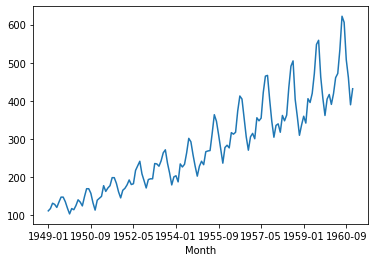

In [ ]:
plot = df.set_index("Month")["#Passengers"].plot();

### What do we see here?

- Trending movement
- Recurring, periodic patterns
    - Can we guess what the period represents?
- And some added variance (noise??)



### How can we describe a time series?

#### Trend - [Stationarity of a process](https://en.wikipedia.org/wiki/Stationary_process)
"... stationary process (a.k.a. a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time."

- If there is a "disturbance" or change from the original path, the time series will "return" to it
- Most common change in non-stationarity is a change in mean e.g. as there is a trend over time
- A number of traditional time series techniques assume a stationary process

In general the [**Dickey-Fuller test**](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test) serves the purpose to conclude whether a process is stationary. 


$$y_{t}=\rho y_{t-1}+u_{t}$$

where $ y_{t}$ is the variable of interest, $t$ is the time index, $\rho$  is a coefficient, and $u_{t}$ is the error term. A unit root is present if $\rho =1$. The model would be non-stationary in this case.

The regression model can be written as:

$${\displaystyle \Delta y_{t}=(\rho -1)y_{t-1}+u_{t}=\delta y_{t-1}+u_{t}\,}$$

where $\Delta$  is the first difference operator. This model can be estimated and testing for a unit root is equivalent to testing $\delta =0$ (where $\delta \equiv \rho -1$). 

If **$p$ probability value is below the 5% confidence threshold**, we are inclined to accept the process as **stationary**. Here in this case - without causing too big of a surprise - we conclude non stationarity.

In [ ]:
## augmented Dickey-Fuller test import:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = adfuller(df["#Passengers"].values)

## the p-value is the second one of the returned objects
print(f"p-value (~'how sure it is that the series has a trend'): {result[1]:.5f}")

print("Should be under 0.05 to assume stationarity")

p-value (~'how sure it is that the series has a trend'): 0.99188
Should be under 0.05 to assume stationarity


#### Visual illustration for trend

Seaborn plays absolutely nicely with coloured boxplots, we could not resist :-)


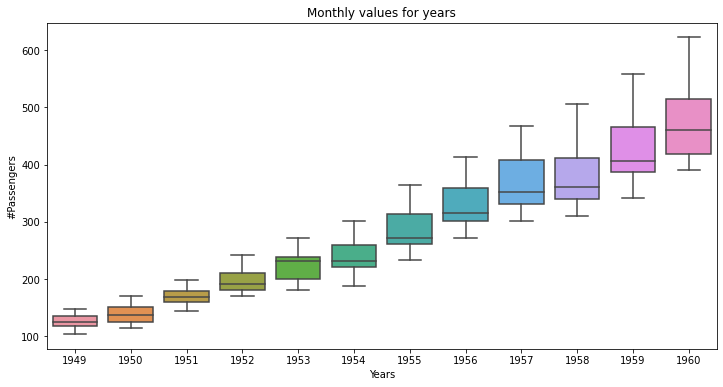

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

reindexed_df = df.copy()
reindexed_df.Month = reindexed_df.Month.astype('datetime64[ns]')
reindexed_df = reindexed_df.set_index("Month")

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x=reindexed_df.index.year, y=reindexed_df["#Passengers"], ax=ax)#, width=20)
plt.title("Monthly values for years")
plt.xlabel("Years")
plt.show()

#### Periodicity (Seasonality)

It is also obvious that there is periodicity in the data, so we should visualize this in periodic, "overlapped" boxplots, to get a sense of it.

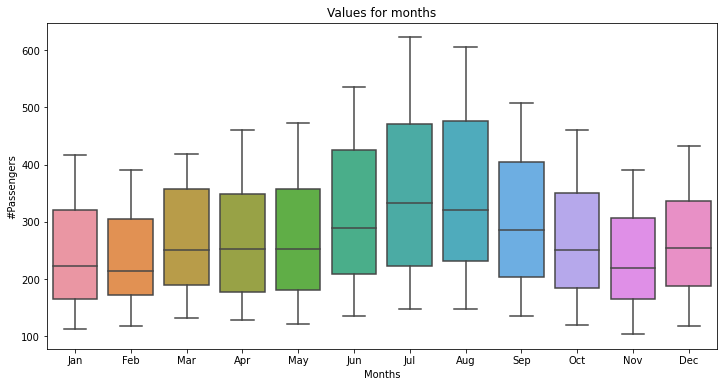

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x=reindexed_df.index.strftime("%b"), y=reindexed_df["#Passengers"], ax=ax)#, width=20)
#to make it more readable, we use the month's abbreviated name (%b) instead of month number, see: 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Period.strftime.html
plt.title("Values for months")
plt.xlabel("Months")
plt.show()

From this we can draw the unusual conclusion that since the early days of commercial flight people tend to go on holidays in the summer. :-)

#### Decomposition

[Source](https://en.wikipedia.org/wiki/Decomposition_of_time_series)

Based on the steps above, we could try to decompose the time series into trend, periodic signal and "residual noise" components. This is an idealistic approach, since it presupposes that everything apart from a trend and a periodic signal is akin to noise and does not take into account that higher order or more complex patters / influences can be present. None the less this is a standard baseline approach that is well worth trying.

- $T_{t}$, the **trend component** at time t, which reflects the long-term progression of the series (secular variation). A trend exists when there is a persistent increasing or decreasing direction in the data. *The trend component does not have to be linear.*
- $S_{t}$, the **seasonal component** at time t, reflecting seasonality (seasonal variation). A seasonal pattern exists when a time series is influenced by seasonal factors. Seasonality occurs over a fixed and known period (e.g., the quarter of the year, the month, or day of the week).
- $I_t$, the **irregular component (or "noise")** at time t, which describes random, irregular influences. It represents the residuals or remainder of the time series after the other components have been removed.

Hence a time series using an additive model can be thought of as

${\displaystyle y_{t}=T_{t}+S_{t}+I_{t},}$

whereas a multiplicative model would be

${\displaystyle y_{t}=T_{t}\times S_{t}\times I_{t}.\,}$ 

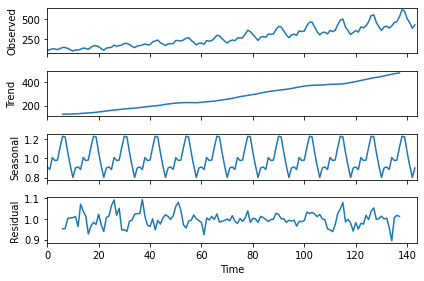

In [ ]:
## for automatic decomposition of a time series:
from statsmodels.tsa.seasonal import seasonal_decompose

## specify the time series, the model type (additive or multiplicative) and the freq (period) for the seasonality
## here we have monthly data that probably has a period of a year, so we specify 12
analysis = seasonal_decompose(df["#Passengers"].values, model="multiplicative", freq=12)

analysis.plot()
plt.show()

We can see the original series at the top, a quite clear trend as well as a complex periodic signal.
It is always worth paying attention to the **residual plot**, since it can happen that there is **still some pattern uncaptured by the decomposition** (as we can suspect in the beginning and the end of the timeseries), which can give hints towards modeling.

The other aspect worth mentioning is the notes of the statsmodels documentation itself:

"The seasonal component is first removed by applying a convolution filter to the data. The average of this smoothed series for each period is the returned seasonal component."



<a href="https://i.stack.imgur.com/2Wze5.png"><img src="https://drive.google.com/uc?export=view&id=15axy1vCD9Ff93GVEkZl5k-nR4v3hv8Zj" height=400 ></a>

In an additive model the period components are added together, in a multiplicative multiplied, so their effect is "cumulative".

We deliberately choose the multiplicative model, but that was based on intuition that we arrived at by looking at the data.

#### What normalizations and transformations can we use?

More on normalizing transformations [here](https://people.duke.edu/~rnau/411diff.htm).



##### Trend
One easy and frequently utilized approach to "detrending" the time series is taking its **first difference**.

More on types of trend and their removal [here](https://machinelearningmastery.com/time-series-trends-in-python/).



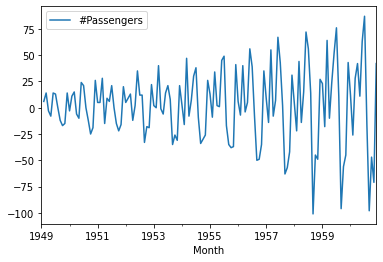

In [ ]:
reindexed_df.diff(1).plot()
plt.show()

As we can see, subtracting $X_{t-1}$ from $X_t$ has the nice effect of "removing" trend. Removing in the sense of normalization. And that is exactly the other widespread usage of `diff`, to normalize a time series into a more easily handleable range even in case of large trends. 

(Note: using differencing to get the detrended series entails an additive model.)

##### Seasonality

If we take a bigger step, it is also possible to counteract the seasonality effects. The good question is, how we know the proper period for it. None the less, `diff` can be a way here, too - albeit pretty a crude one.

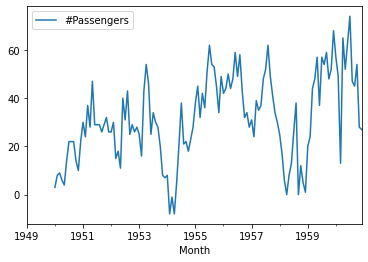

In [ ]:
## diff(12) on a monthly data means a yearly period
reindexed_df.diff(12).plot()
plt.show()

##### Fractional differencing

It is worth mentioning, that there has been work done for extending the differencing methods to non-integer fractions to the observation period, such as demonstrated in [this paper](https://wwwf.imperial.ac.uk/~ejm/M3S8/Problems/hosking81.pdf). The argument is that long-term dependencies can be captured more easily with this method.

The idea found some use quite recently based on this [book](https://www.amazon.com/Advances-Financial-Machine-Learning-Marcos/dp/1119482089) in the financial domain. (some code examples [here](https://github.com/philipperemy/fractional-differentiation-time-series).) 

##### Multiplicative effects

For multiplicative effects we could try `log` transformation.

More on nice properties of logarithmic transformations [here](http://people.duke.edu/~rnau/411log.htm).

(Alternatively, twice differencing could be tried...)

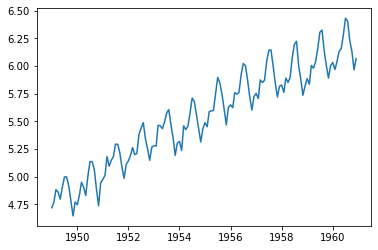

In [ ]:
import numpy as np

plt.plot( reindexed_df.index.values, np.log(reindexed_df["#Passengers"]) )
plt.show()

##### What remains?

This is absolutely not best practice, but we can see what remains if we chain together the transformations.

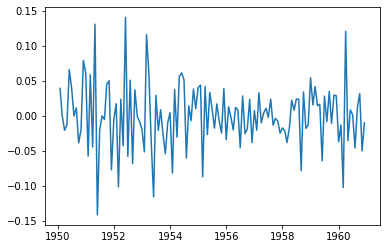

In [ ]:
logs = pd.Series(np.log(reindexed_df["#Passengers"])).diff(1).diff(12)
plt.plot(reindexed_df.index.values, logs)
plt.show()

##### Takeaways

Please observe, that these were all reversible transformations, but none the less radically altered our outlook just because they meant different **representations** of the data.

More on some transformations and their usage see [here](https://people.duke.edu/~rnau/whatuse.htm).

It is debatable if such transformations help in modeling, but that also strongly depends on the model. For a more detailed discussion see this [paper](https://research.cs.aalto.fi/aml/Publications/Publication173.pdf).

#### [Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation) and [partial autocorrelation](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)

"Back to the Markov question"

We should take into account all the above insights at the modelling stage, but it is also important to think about the **temporal dependency inside the process** that unfolds in time. (We can think of it as "how big is the memory capacity of the process".) 

The baseline - and understandably naive - approach to analysing this is the modeling of autocorrelations. This is just the basic data science method of observing correlations - though in time, between different points "back" in time, and the "present" value in a "sliding window".

While [ACF](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html) (**autocorrelation function**) observes correlations "naively" with some amount of time-points, [PACF](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html) (**partial autocorrelatoin function**) tries to control for the fact, that **the effect of points in time travel through the series**, so if there is a very influential effect in an early point in time, its effect would be influencing _all next time points, making them look also influential_. In PACF this is controlled for.



**Autocorrelation** for a continous time signal:
Given a signal $f(t)$, the continuous autocorrelation  $R_{ff}(\tau )$ is most often defined as the continuous cross-correlation integral of $f(t)$ with itself, at lag $\tau$ 

$${\displaystyle R_{ff}(\tau )=\int _{-\infty }^{\infty }f(t+\tau ){\overline {f(t)}}\,{\rm {d}}t=\int _{-\infty }^{\infty }f(t){\overline {f(t-\tau )}}\,{\rm {d}}t} $$



**Auto-correlation** of discrete-time signal:
The discrete autocorrelation $R$ at lag $\ell$  for a discrete-time signal $y(n)$ is

$${\displaystyle R_{yy}(\ell )=\sum _{n\in Z}y(n)\,{\overline {y(n-\ell )}}} {\displaystyle R_{yy}(\ell )=\sum _{n\in Z}y(n)\,{\overline {y(n-\ell )}}}$$



**Partial auto correlation:**
Given a time series $ z_{t}$, the partial autocorrelation of lag k, denoted $\alpha(k)$, is the autocorrelation between $z_{t}$ and $z_{{t+k}}$ with the linear dependence of $z_{t}$ on $z_{{t+1}}$ through $z_{t+k-1}$ removed; equivalently, it is the **autocorrelation between $z_{t+1}$ and $z_{t+k+1}$ that is not accounted for by lags 1 to k, inclusive**.

${\displaystyle \alpha (1)=\operatorname {corr} (z_{2},z_{1}),{\text{ for }}k=1,}$
${\displaystyle \alpha (k)=\operatorname {corr} (z_{t+k+1}-P_{t,k}(z_{t+k+1}),\,z_{t+1}-P_{t,k}(z_{t+1})),{\text{ for }}k\geq 2,}$

where $P_{{t,k}}(x)$ is surjective operator of orthogonal projection of $x$ onto the linear subspace of Hilbert space spanned by ${\displaystyle x_{t+1},\dots ,x_{t+k}}$.

 

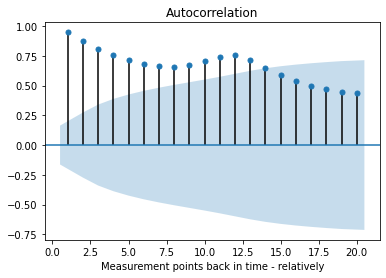

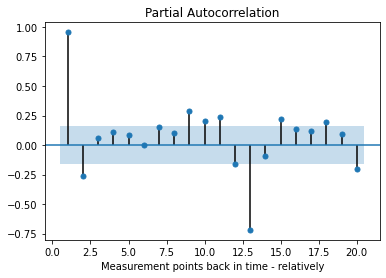

---


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.close()
plot_acf(df["#Passengers"].values, lags=20, zero=False)
plt.xlabel("Measurement points back in time - relatively")
plt.show()
plot_pacf(df["#Passengers"].values, lags=20, zero=False)
plt.xlabel("Measurement points back in time - relatively")
plt.show()
print("---")

The blue area represents confidence intervals, so the real signals are the far outliers. 

It is interesting to see that the "year before" measurement is strongly influential - this implies at least a year of "memory" in the system, and much of the effects visible in ACF just "pass through" from former. It is well worth using ACF!

## Modeling demonstration

### First try: the linear way

It is easy and obvious to set up a linear model for the data. The only thing worth mentioning is that since we only have one measurement $y$ (univariate), the $x$ coordinate here is time itself, so we model how the data changes with respect to time.


#### Detour: Measuring goodness - No shuffling, please!

As always we should separate training and test data, with the help of `train_test_split` from Scikit.

It is of paramount importance though, that we **disable the random shuffling** of the dataset, which is _on by default_ so that we **preserve the temporal patterns**! 

**Validation of time series models is a bit trickier than in the normal regression case.**

For a good summary see:
[How To Backtest Machine Learning Models for Time Series Forecasting](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)

1. Train-Test split that respects temporal order of observations.
2. Multiple Train-Test splits that respect temporal order of observations.
3. Walk-Forward Validation where a model may be updated each time step new data is received.

As well as [this](https://blog.insightdatascience.com/whats-wrong-with-my-time-series-model-validation-without-a-hold-out-set-94151d38cf5b) in depth blogpost, together with [this](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.30.6748) and [this](https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html) paper.

It is also worth noting that some alternative error measures can also be applied in time series case, like [MASE](https://robjhyndman.com/publications/another-look-at-measures-of-forecast-accuracy/) implemented [here](https://github.com/CamDavidsonPilon/Python-Numerics/blob/master/TimeSeries/MASE.py).

#### Detour 2: Measuring in what?

The measurement of accuracy in time series predictions is in itself a complex subject. The different opinions and measurement models should match the exact business context and support the actions we would like to take.

A short summary well worth reading through in this topic: [Naughty APEs (Absolute Percentage Error) and the quest for the holy grail](http://forecasting.svetunkov.ru/en/2017/07/29/naughty-apes-and-the-quest-for-the-holy-grail/).


#### Linear regression: index as input

In [ ]:
from sklearn.model_selection import train_test_split

# !!! shuffle = False !!!
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)

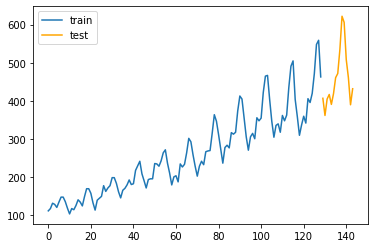

In [ ]:
ax = train_data.rename({"#Passengers":"train"}, axis=1).plot()
test_data.rename({"#Passengers":"test"}, axis=1).plot(ax=ax, c="orange");

... and we train a linear model

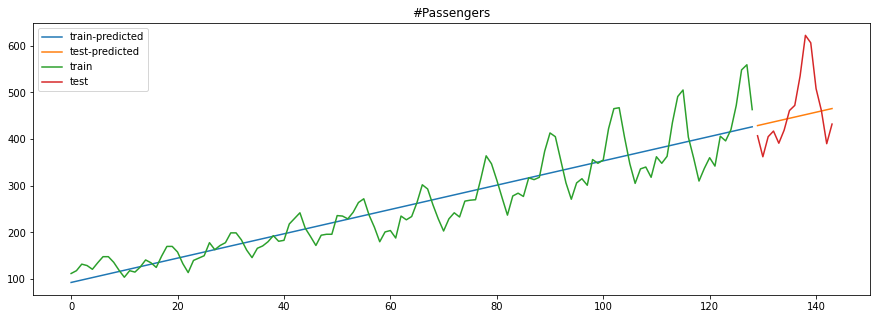

In [ ]:
from sklearn import linear_model

lin_model= linear_model.LinearRegression()
lin_model.fit(train_data.index.astype("int64").values.reshape(-1, 1),train_data["#Passengers"].values)#

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index =train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index

plt.figure(figsize=(15,5))

plt.plot(train_fit, label="train-predicted")
plt.plot(prediction, label="test-predicted")

plt.plot(train_data["#Passengers"], label="train")

plt.plot(test_data["#Passengers"], label="test")

plt.title("#Passengers")
plt.legend()

plt.show()

With no surprise we observe that this captured the **main trend** in the series, which is really imprecise, but can none the less be informative.

#### Linear regression: previous values as input

In [ ]:
df2 = df.copy()

## let's add previous month's values based on what seemed important in the PACF plot...
for i in [1,2, 9, 12]:
  df2[f"prev{i}th_month"] = df2["#Passengers"].shift(i).bfill() ## we only backfill train data
train_data, test_data = train_test_split(df2, test_size=0.1, shuffle=False)  

In [ ]:
xcols = [c for c in df2.columns if c.startswith("prev")]
xcols

['prev1th_month', 'prev2th_month', 'prev9th_month', 'prev12th_month']

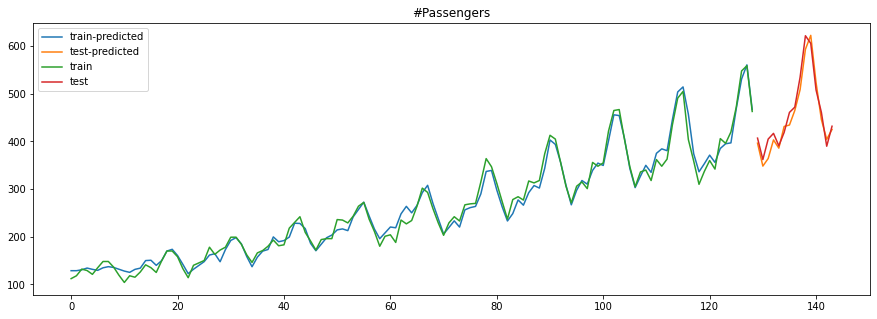

In [ ]:
lin_model2 = linear_model.LinearRegression()
lin_model2.fit(train_data[xcols],train_data["#Passengers"])#

train_fit2 = lin_model2.predict(train_data[xcols])
train_fit2 = pd.Series(train_fit2)
train_fit2.index = train_data.index

prediction2 = lin_model2.predict(test_data[xcols])
prediction2 = pd.Series(prediction2)
prediction2.index = test_data.index

plt.figure(figsize=(15,5))

plt.plot(train_fit2, label="train-predicted")
plt.plot(prediction2, label="test-predicted")

plt.plot(train_data["#Passengers"], label="train")

plt.plot(test_data["#Passengers"], label="test")

plt.title("#Passengers")
plt.legend()

plt.show()

By **using previous time steps' values**, we are now able to capture the time series' patterns much better. This idea is at the center of the following classical forecasting models...

### Exponential smoothing

If we believe that the causal effects in timeseries "flow along" smoothly, it is all the more logical to assume that the **prior signals are directly affecting the present ones**, albeit the **"far past" is having an exponentially smaller effect than the recent**.

The technique of **exponential smoothing** is based exactly on this assumption.

<a href="https://cdn-images-1.medium.com/max/1400/1*rWt9KIT0jVJzlIJ2sI8-Dg.png"><img src="https://drive.google.com/uc?export=view&id=1G6hJdRx49ZL63FB7GVl0Jgxy46Uu9qhn" width=500px></a>

where 0≤ α ≤1 is a **smoothing parameter**.

More details [here](https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1). (For more simple smoothing techniques, see the same source...)

"The weights decrease rate is controlled by the smoothing parameter α. If α is large (i.e., close to 1), more weight is given to the more recent observations. There are 2 extreme cases:

α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data, which is called **Average method**.

α=1: simply set all forecasts to be the value of the last observation, which is called **Naive method** in statistics."

[Source](https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1)

As we can see, we are also trying to estimate some kind of "memory capacity".

In [ ]:
## using statsmodels, NOT sklearn!
from statsmodels.tsa.api import ExponentialSmoothing

Prediction with ES method:

predicted=463.000000, expected=407.000000
predicted=407.000000, expected=362.000000
predicted=362.000000, expected=405.000000
predicted=405.000000, expected=417.000000
predicted=417.000000, expected=391.000000
predicted=391.000000, expected=419.000000
predicted=419.000000, expected=461.000000
predicted=461.000000, expected=472.000000
predicted=472.000000, expected=535.000000
predicted=535.000000, expected=622.000000
predicted=622.000000, expected=606.000000
predicted=606.000000, expected=508.000000
predicted=508.000000, expected=461.000000
predicted=461.000000, expected=390.000000
predicted=390.000000, expected=432.000000

Mean abs error: 45.79999999999997
Explained variance: 0.5196648416088108


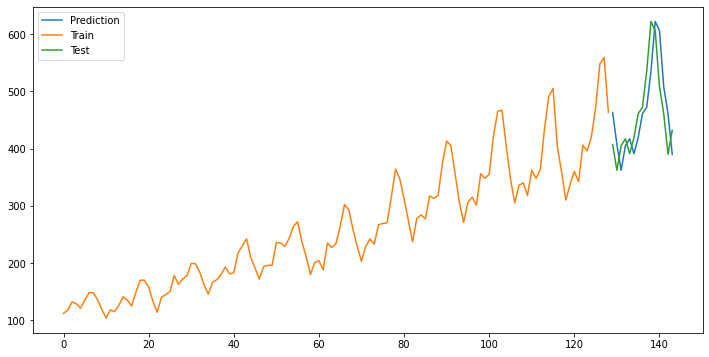

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, explained_variance_score

history = [x for x in list(train_data["#Passengers"].values.astype("float"))]
predictions = list()

print("Prediction with ES method:\n")

# We iterate through the test set step by step
# Yes, test set. This can be undestood as an on-line learning scenario, for each datapoint 
for t in range(len(list(test_data["#Passengers"].values.astype("float")))):
    
    # Model initialization
    model = ExponentialSmoothing(history)
    
    # Worth noting that with seasonality, trend and additivity parameters well chosen
    # - since statsmodels is quite clever - 
    # we could reach MUCH better results. This is only a naive demonstration
    
    model_fit = model.fit(use_boxcox=True)

    # Predicting one step ahead
    output = model_fit.forecast(1)

    # collecting predictions
    yhat = output[0]
    predictions.append(yhat)
    
    #doing one step in time
    obs = list(test_data["#Passengers"].values.astype("float"))[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
   
errors = np.array(test_data["#Passengers"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["#Passengers"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["#Passengers"].values,predictions))

predictions = pd.Series(predictions)
predictions.index = test_data.index    

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["#Passengers"], label="Train")

plt.plot(test_data["#Passengers"], label="Test")
plt.legend()
plt.show()

In [ ]:
## the model parameters (of the last model fitted)
model_fit.params

{'damping_slope': nan,
 'initial_level': 6.563595030450312,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': 0.1329659966246411,
 'remove_bias': False,
 'smoothing_level': 1.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': True}

In [ ]:
## the forecasted values (of the last model fitted)
model_fit.fcastvalues

array([390.])

> Note: **simple exponential smoothing forecasts are "flat"**: each subsequent forecast is the same!
> -> If our time series has trend or seasonality, and we'd like to forecast more time steps ahead, more complex exponential smoothing variants are needed that take into account trend and seasonality. A good overview (with R code): https://otexts.com/fpp2/taxonomy.html

##### Effect of the smoothing level parameter

In [ ]:
## our initial "history" (train data) is our train data
history = list(train_data["#Passengers"].values.astype("float"))

## a dictionary where we will collect test set predictions for each smoothing level (alpha)
predictions_dict = dict()

for alpha in [0, 0.2, 0.6, 1]:
  ## the predictions list (for the test set) using a given alpha
  predictions = list()

  ## for each time point in the test data
  for t in range(len(test_data)):
    ## instantiate a new model
    model = ExponentialSmoothing(history)

    ## fit the model on the 
    ## note: Box Cox transforms non-normal variables into a normal shape
    model_fit = model.fit(smoothing_level=alpha, use_boxcox=True)
    
    ## prediction for next time step
    output = model_fit.forecast(1)
    yhat = output[0]  ## just one forecast, but we still get an array, so get just the forecast (hence index 0)
    predictions.append(output)
    
    ## assume one time step passes, append true observation to history
    obs = list(test_data["#Passengers"].values.astype("float"))[t]
    history.append(obs)
  
  ## all the predictions made using this alpha
  predictions_dict.setdefault(alpha, predictions)


alpha = 0: mean abs error: 210.12153901129489
alpha = 0: explained variance: 0.05801933344758847

alpha = 0.2: mean abs error: 59.78734368357895
alpha = 0.2: explained variance: -0.007568172748484869

alpha = 0.6: mean abs error: 49.19945740241447
alpha = 0.6: explained variance: 0.37120310584640526

alpha = 1: mean abs error: 43.73333333333335
alpha = 1: explained variance: 0.548439293307494


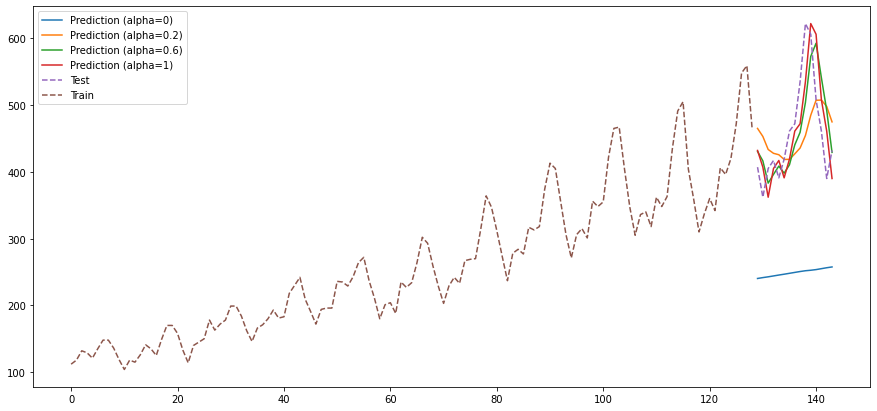

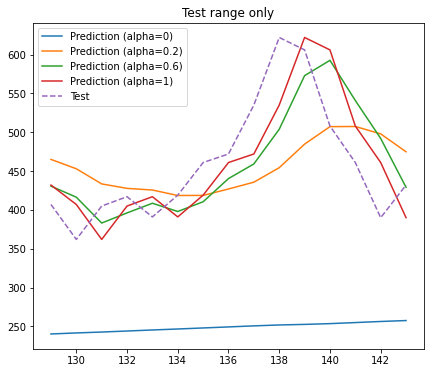

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

for alpha in predictions_dict.keys():
  predictions = predictions_dict[alpha]    
  errors = np.array(test_data["#Passengers"].values)-np.array(predictions)
  print()
  print(f"alpha = {alpha}: mean abs error:",mean_absolute_error(test_data["#Passengers"].values,predictions))
  print(f"alpha = {alpha}: explained variance:",explained_variance_score(test_data["#Passengers"].values,predictions))

  predictions = pd.Series(predictions)
  predictions.index = test_data.index    

  plt.plot(predictions, label=f"Prediction (alpha={alpha})")

plt.plot(test_data["#Passengers"], label="Test", linestyle="--")
plt.plot(train_data["#Passengers"], label="Train", linestyle="--")



plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(7,6))
for alpha in predictions_dict.keys():
  predictions = predictions_dict[alpha]    
  errors = np.array(test_data["#Passengers"].values)-np.array(predictions)
  predictions = pd.Series(predictions)
  predictions.index = test_data.index    

  plt.plot(predictions, label=f"Prediction (alpha={alpha})")

plt.plot(test_data["#Passengers"], label="Test", linestyle="--")
plt.legend()
plt.title("Test range only")
plt.show()

### ARIMA

[Autoregressive Integrated Moving Average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) is a traditional modeling technique, which - as its name implies - uses **autoregression and a moving average component** to model the "present moment" with respect to prior moments with an autoregressive and some smoothed moving average (different smoothing techniques can be used, see more [here](https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average), for more detailed elaboration see [here](https://medium.com/@abhinav.mahapatra10/beginners-ml-basics-exponentially-weighted-moving-average-8ce3e75768f6)) - these are the _AR_ and _MA_ in the names.
The _integral_ part (the I) comes from the fact that ARMA is extended, and is applied to the differenced time series, thus representing "trend". **I=1 is the first difference, it represents linear trend**.

* **AR = autoregressive**: forecast the variable using a linear combination of its past values
* **MA = moving average**: value to forecast is assumed to be a weighted moving average of the past forecast *errors*
* **I = integral**: the degree of differencing to be used (1 = linear trend, 2 = second-order differencing needed to get to stationarity).

> A good in-depth description, with code in R: https://otexts.com/fpp2/non-seasonal-arima.html

It is important to note, that ARIMA is parametrized by hand, in our case we use `ARIMA(..., order=(5,1,0))` which means 5 autoregressive components, first difference and no moving averages for illustration. In choosing AR components it is instructive to look at the fitted model (in our code, `model_fit`), which stores goodness of fit mertics, but **ACF and PACF is equally informative**.

ARIMA is well suited for "online learning", see code: we always forecast just 1 timestep ahead, and we assume that our training data is updated with each step forward.


In [ ]:
## again using a statsmodels implementation:
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in list(train_data["#Passengers"].values.astype("float"))]
predictions = list()

print("Predicting forward with ARIMA:\n")

# We iterate through the test set step by step
# Yes, test set. This can be undestood as an on-line learning scenario, for each datapoint 
for t in range(len(list(test_data["#Passengers"].values.astype("float")))):
    # Initialize model
    model = ARIMA(history, order=(5,1,0))

    # Do Scikit-like mode.fit(), disp=0 so that no bullshit output on stdout, please! 
    model_fit = model.fit(disp=0)

    # Forecast one time period ahead
    output = model_fit.forecast()
    # Collect it
    yhat = output[0]
    predictions.append(yhat)
    
    #Step one further in time
    obs = list(test_data["#Passengers"].values.astype("float"))[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



Predicting forward with ARIMA:

predicted=418.350436, expected=407.000000
predicted=395.543467, expected=362.000000
predicted=369.154106, expected=405.000000
predicted=462.556281, expected=417.000000
predicted=430.294409, expected=391.000000
predicted=386.854376, expected=419.000000
predicted=420.185486, expected=461.000000
predicted=470.788346, expected=472.000000
predicted=474.014219, expected=535.000000
predicted=543.795124, expected=622.000000
predicted=632.760460, expected=606.000000
predicted=582.878286, expected=508.000000
predicted=464.229432, expected=461.000000
predicted=454.920845, expected=390.000000
predicted=387.994681, expected=432.000000



Mean abs error: 39.51648527707577
Explained variance: 0.6333881796339611


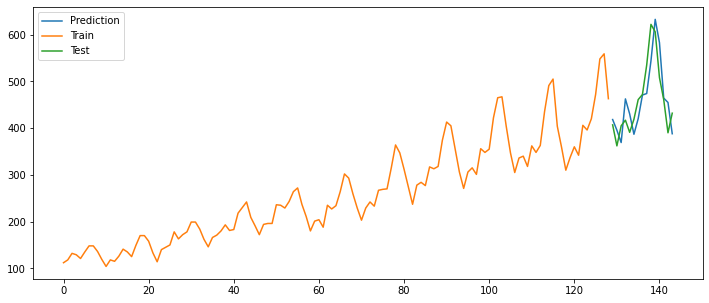

In [ ]:
# Do some error analysis
    
errors = np.array(test_data["#Passengers"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["#Passengers"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["#Passengers"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index    

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["#Passengers"], label="Train")

plt.plot(test_data["#Passengers"], label="Test")
plt.legend()
plt.show()

## Other ways of time series modeling

### Time Series as multiple regression problem

With appropriate sampling methods we can re-phrase time series problems into regression problems in a more interesting manner, meaning not just taking time as the independent and the target value for dependent variable, but using a **window approach** and thus getting back to a multiple regression problem, with

- __X__ matrix containing the elements of the **training time window** and
- __y__ being the next time **step to be predicted**

<a href="https://pcp.io/docs/images/trace_buffer.png"><img src="https://drive.google.com/uc?export=view&id=1ugYRPN91N0-CmbpNPwcWewbeNe0c3fNA" width=400 heigth=400></a>

- Example 1.: "I have to make a prediction on each Sunday evening"
- Example 2.: "I would like to have a daily forecast"

In this case all the machinery of regression - and thus Scikit's toolbox - is at our disposal.

### Time series classification

But if we accept the constraints of window based approaches - which we, despite our concerns - often do with great success, there's nothing to prevent us from doing time series classification based on the data structure outlined above, only __y__ being categorical, rather than a numeric value.

In this case, basically we treat **one time step back as one column** and fit a regular classifier on top. 

It is also noteworthy, that this represents a rather "raw" data, thus much of what we learn in **"representation learning"** can be applied here. In fact, there are approaches to use PCA-like decompositions, either on the raw data (time domain), or its representation in the frequency domain, like [Singular Spectrum Analysis](https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition). 

More on features for time series classification [here](https://medium.com/datadriveninvestor/time-series-classification-using-feature-extraction-16209570a22e) 

As in case of non-time series data, the appropriate **feature engineering** is rather important and non-trivial. There are two approaches in this:

#### Automatic feature extraction and selection on time series

In 2014 a [paper](https://arxiv.org/abs/1401.3531) appeared in which the authors argue for an approach where a large number of descriptive features are being automatically generated for the given time series, and later on some will be chosen based on their predictive value. This approach was the foundation for the [hctsa](https://github.com/benfulcher/hctsa) package implemented in MATLAB, with Python accessors.

In 2016 in the same spirit a new pair of results appeared [here](https://arxiv.org/abs/1610.07717) and [here](https://www.researchgate.net/profile/Maximilian_Christ2/publication/324948288_Time_Series_FeatuRe_Extraction_on_basis_of_Scalable_Hypothesis_tests_tsfresh_-_A_Python_package/links/5b0d10710f7e9b1ed7fbf9b9/Time-Series-FeatuRe-Extraction-on-basis-of-Scalable-Hypothesis-tests-tsfresh-A-Python-package.pdf?origin=publication_detail). This laid down the foundation of the highly performant and scalable [**tsfresh**](https://tsfresh.readthedocs.io/en/latest/) package.

<a href="https://github.com/blue-yonder/tsfresh/raw/master/docs/images/introduction_ts_exa_features.png"><img src="https://drive.google.com/uc?export=view&id=193d8GEAi1Bio9nXcWTRNfyLha45gcawj" width=55%></a>

The package accepts time series in some given formats, generates **hundreds of features** from the easy to the complicated and then automatically prunes the feature set, keeping only the most predictive ones. With an ensemble based classifier (think RandomForest or XGBoost) it can achieve **highly competitive** results.


#### End-to-end learning

Our goal would be to have such flexible models and learning procedures that can spare us the burden of manual feature engineering.

### Classical decomposition methods

It is a "tried and proven" method with a great deal of literature to **decompose continuous functions into $sin$ and $cos$ components**, which can also be applied to discrete timeseries also, see [**Fourier decomposition**](https://en.wikipedia.org/wiki/Fourier_analysis).

The main intuition behind it is that any general function can be approximated by the sum of trigonometric functions.

(It is inside many of the standard decompositions of scientific libraries by default.)

<a href="https://i.stack.imgur.com/27HVo.gif"><img src="https://drive.google.com/uc?export=view&id=1hFoHdwUoAc900vO8Wt7guemQroPjZttv"></a>

[source](https://electronics.stackexchange.com/questions/353253/what-kind-of-signal-processing-circuitry-do-i-need-to-generate-a-line-level-outp?noredirect=1&lq=1)


In [ ]:
from IPython.display import HTML


HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')


#### [Periodogram](https://en.wikipedia.org/wiki/Periodogram) in our case

* frequencies (plotted on x-axis) = 1 time unit / period
* density (plotted on y-axis) = distribution of power into the particular frequency component

**Periods (=1/freq) with greatest density are the most dominant ones.**

> Eg.: monthly data,
> * with highest density at the 0.083333 frequency 
> * 1/0.083333 = 12 months = 1 year is the dominant cyclic period.

(Don't forget that frequency inversely proportional to period! --> *Higher frequency = smaller period*.)

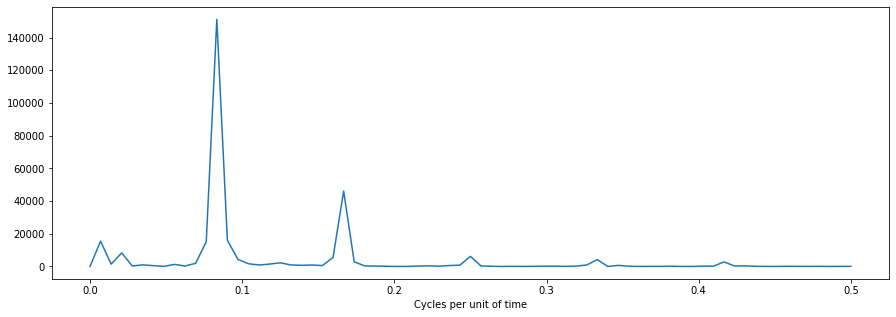

In [ ]:
from scipy.signal import periodogram

freq, density = periodogram(reindexed_df["#Passengers"], detrend='linear')
plt.figure(figsize=(15,5))
plt.plot(freq, density)
plt.xlabel("Cycles per unit of time")
plt.show()

In [ ]:
print("The freq. with highest density is", freq[density.argmax()])
print("This corresponds to the period", round(1/freq[density.argmax()], 2) )


The freq. with highest density is 0.08333333333333333
This corresponds to the period 12.0



####  Two drawbacks:

- It is most well **suited for periodically repeating signals**, where the pattern is repeating ad infinitum.
    - A good answer for this challenge can be the usage of ["wavelets"](https://en.wikipedia.org/wiki/Wavelet_transform), which are "signal elements" localized in coordinate space. In this case the choice of appropriate wavelets is the question. 
    
<a href="https://www.continuummechanics.org/images/wavelets/wavelet_samples.jpg"><img src="https://drive.google.com/uc?export=view&id=1Q1XEUrnINVjzcusnrkBibtrAm3zvN6sG" width="600"></a>

For Wavelet type models in Python please see [PyWavelets](https://pywavelets.readthedocs.io/en/latest/), and for a good in-depth introduction [here](http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/)
    
    


- The other challenge is, that Fourier methods are best suited for **stationary data**, it is **important to de-trend them.**
    - Though solutions were presented also for this eg.: [this](https://arxiv.org/abs/1503.06675)
    
    


### Additional resources:

- There are other sophisticated methods for time series prediction, amongs them **[Kálmán filter](https://en.wikipedia.org/wiki/Kalman_filter)**; for an intuitive demonstration see [here](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/).


- Facebook developed a strong set of tools for time series forecasting, that is worth mentioning and experimenting with.
    - The **"Prophet"** tool can be found [here](https://github.com/facebook/prophet) 
    - Corresponding whitepaper [here](https://peerj.com/preprints/3190/)
    - Usage example [here](https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a)


- A good and detailed **overview of methods** can be gained from [this](https://arxiv.org/pdf/1503.07493.pdf) paper from 2015.

## Conclusion of time series - for now

Though many methods exist for time series forecasting, some of the typically "nasty" sequences and time series (think for example language as well as eg. financial datasets), especially with **long term dependencies** and **complex, unknown inner structure** do not lend themselves easily for modeling.

The big question will be, how we can use the paradigm of **end-to-end learning for tackling time series problems.**